In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
import scipy.stats as st

# Introduccion
La forma de obtener distribuciones de una variable que siga una cierta distribucion de probabilidad es variada. Para desarrolar una distribucion gaussiana, tanto el metodo de la funcion inversa, como el metodo de Monte Carlos fallan. El primero debido a que no se puede invertir (da la funcion error) y el segundo es debido a que no es de soporte compacto. Por ello que se requiere del metodo de Box-Muller. En este metodo se usan dos numeros randonm con probabiidad uniforme y usando el teorema de cambio de variables aleatorias se pueden obtener mediante el cambio propuesto dos variables aleatorias que siguen esa distribucion. comenzamos con dos gaussiana $$f(x) = \frac{e^\frac{−x^2}{2}}{\sqrt{2π}}$$. $$g(y) = \frac{e^\frac{−y^2}{2}}{\sqrt{2π}}$$ al ser ambas independientes la multiplicacion de ambas es la funcion densidad conjunta $$F(x,y) = \frac{e^\frac{−(x^2+y^2)}{2}}{{2π}}$$. luego a traves del cambio 

$$R^2=x^2+y^2$$  
$$tan(\theta)=\frac{y}{x}$$ y del teorema del cambio de variable aleatoria: 

<img src="cam.png">

se obtiene 

$$F(R^2,\theta)=\frac{1}{2}\cdot \frac{1}{2\pi} \cdot e^\frac{-R^2}{2}$$
esto son dos varibles aleatorias, una con distribucion plana entre $\theta=(0,2\pi)$ y $R^2$ una distribucion exponencial $\frac{1}{2}\cdot e^\frac{-R^2}{2}$ donde el $\frac{1}{2}$ es debido al al jacobiano.
formando estas variables a partir de dos variables aleatorias uniformes entre (0 y 1) (ver ejercicio 5 para entender la distribucion exponecial)

$${\displaystyle R^2=-2\cdot \ln U_{1}\,}$$

$${\displaystyle \theta =2\pi U_{2}\,}$$

Con esto podemos pasar a las variables $x$ e $y$ que tienen las distribucion gaussiana, recordemos que las variables $x$ e $y$ en funcion de polares son

$${\displaystyle x=R\cos(\theta )={\sqrt {-2\ln U_{1}}}\cos(2\pi U_{2})\,}$$


$${\displaystyle y=R\sin(\theta )={\sqrt {-2\ln U_{1}}}\sin(2\pi U_{2}).\,}$$

para evitar calcular senos o cosenos, que son costosos para la calculadora, se piensa en un cuadrado de lados 2 y se cambian las variables para generar puntos dentro de un circulo unidad.
entonces se define un algoritmo como el siguiente
a partir de U1 y U2
1- haces $V1=2 \cdot U1 -1 , V2=2 \cdot U2 - 1 y S=V1^{2}+V2^{2}$
2- si $S>1$ ese valor no sirve

3-$${\displaystyle x={\sqrt \frac{-2\ln {S}}{S}} \cdot V1} $$


$${\displaystyle y={\sqrt \frac{-2\ln {S}}{S}} \cdot V2} $$

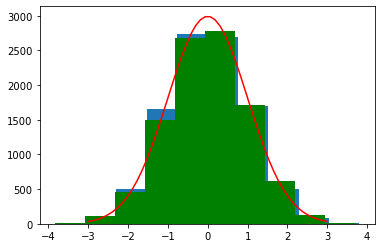

In [4]:
N=10000
u1=np.random.random(N)
u2=np.random.random(N)
n1=[]
n2=[]
Pi=math.pi
A=7500
for i in range(N):
  
    n1.append(((-2*math.log(1-u1[i]))**0.5)*math.cos(2*Pi*u2[i]))
    n2.append(((-2*math.log(1-u1[i]))**0.5)*math.sin(2*Pi*u2[i]))
    
plt.hist(n1);
plt.hist(n2,color='green');

z = np.linspace(-3.0, 3.0)

plt.plot(z, A*st.norm.pdf(z, 0, np.sqrt(1)),color='red')
plt.show()

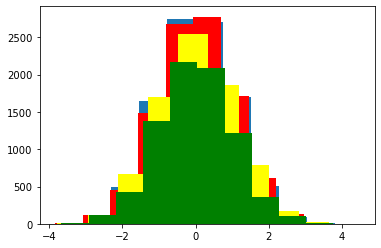

In [5]:
S=[]
n3=[]
n4=[]
V1=[]
V2=[]
for i in range(N):
    V1.append(2*u1[i]-1)
    V2.append(2*u2[i]-1)
    S.append(V1[i]**2+V2[i]**2)
    
for i in range(N):
      if (S[i]<1):
        n3.append((((-2*math.log(S[i]))/S[i])**0.5)*(V1[i]))
        n4.append((((-2*math.log(S[i]))/S[i])**0.5)*(V2[i]))


plt.hist(n1)
plt.hist(n2,color='red');
plt.hist(n3,color='yellow');
plt.hist(n4,color='green');
  
    


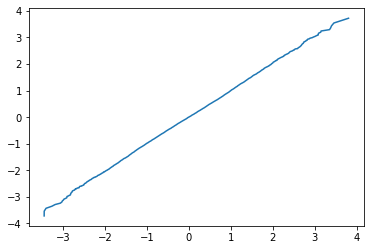

In [7]:

n1.sort()
N=len(n1)
Z1=[]
for i in range(N):
    Z1.append(sp.stats.norm.ppf(i/N))
    
plt.plot(n1,Z1);


# Conclusion

En este problema se ve como el metodo de Box-Muller nos sirve para generar dos variables aleatorias con distribucion gausseanas, ya que por los otros metodos veiamos que teniamos problemas con algunas hipotesis necesarias. Ademas al comparar con una definicion mas teorica, usando la funcion de scipy de quantile que nos permite obtener el iesimo-quantil (i/N) y permitiendonos construir una curva con los valores discretos obtenidos por el metodo de Box-Muller. Si las dos distribuciones tienen la misma forma tenemos que obtener una recta como se obtiene en el grafico superior.
Con respecto a la eficiencia, a la computadora le es costoso calcular senos y cosenos, por lo tanto si sorteo numeros en el circulo unidad, me salteo ese paso y puede hacer el proceso mas eficiente para la computadora